In [1]:
#deadline 16 jan 2023 20:00
# Fine delle consegne: giovedì, 12 gennaio 2023, 20:00 (6 giorni mancanti)

# description 

<img src="./16_description.png" alt="Alternative text" />

In [5]:
#slides
#the session in which he explanined stuff
#the mamrez pdf
#youtube 
#chat gpt
#the paper we have in the group 

In [1]:
#some of the questions I asked from chat gpt:


<b>what is intensity in Hawkes process?</b> <br>
In a Hawkes process, the intensity is a measure of the rate at which events occur over time. It is defined as the expected number of events that occur in a given interval of time, given the history of past events.

The intensity function in a Hawkes process is a function that describes how the intensity changes over time. It is typically denoted by the symbol λ(t), where t is the time at which the intensity is being measured.

In a basic Hawkes process, the intensity function has two components: a background component, which represents the average rate at which events would occur in the absence of any triggering effects, and a triggering component, which represents the additional rate at which events occur due to the influence of past events.

The intensity function in a Hawkes process is often defined using an exponential kernel, which describes how the influence of past events decays over time. This allows the intensity function to capture the fact that the influence of past events on the likelihood of future events tends to decrease as time passes.

This code is generated by<b>chat gpt<b>

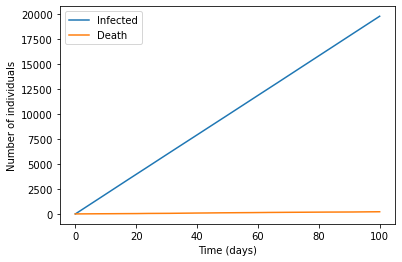

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Set the time horizon
T = 100

# Set the time step
dt = 0.01 # we have to deal with this part (this one shouldn't be set by the user)

# Set the initial number of infected and death individuals
I = 0
D = 0
t=0
# Set the parameters of the Hawkes process
sigma = 20 * (t >= 0) * (t <= 10)
m = 2

# Initialize the time and intensity arrays
time = np.arange(0, T+dt, dt)
intensity_1 = np.zeros(len(time))
intensity_2 = np.zeros(len(time))

# Set the infection and death arrays
infection = np.zeros(len(time))
death = np.zeros(len(time))

# Set the infection and death rates
infection_rate =  0.98
death_rate = 0.02

# Set the lambda parameter for h(t) = lambda * exp(-lambda * t)
lambda_param = 1/10

# Set the initial intensity for h(t) = uniform[0, 20]
intensity_1[0] = np.random.uniform(0, 20)

# Set the initial intensity for h(t) = lambda * exp(-lambda * t)
intensity_2[0] = lambda_param

# Iterate over the time steps
for i, t in enumerate(time[:-1]):
    # Compute the intensity for h(t) = uniform[0, 20]
    intensity_1[i+1] = intensity_1[i] + sigma * dt + m * np.sum(np.exp(-lambda_param * (time[i+1] - time[:i+1])))

    # Compute the intensity for h(t) = lambda * exp(-lambda * t)
    intensity_2[i+1] = intensity_2[i] + sigma * dt + m * np.sum(np.exp(-lambda_param * (time[i+1] - time[:i+1])))

    # Generate a random number to determine if an infection occurs
    r = np.random.uniform(0, 1)
    if r < intensity_1[i+1] * dt:
        I += 1
    if r < intensity_2[i+1] * dt:
        I += 1

    # Generate a random number to determine if a death occurs
    r2 = np.random.uniform(0, 1)
    if I > 0 and r2 < death_rate:
        D += 1
        I -= 1

    # Update the infection and death arrays
    infection[i+1] = I
    death[i+1] = D

# Plot the evolution of infected and death individuals over time
plt.plot(time, infection, label='Infected')
plt.plot(time, death, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()


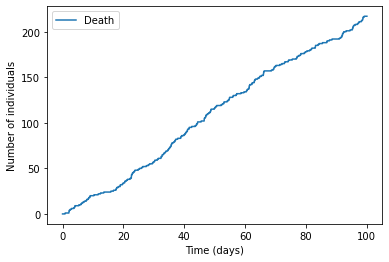

In [4]:
plt.plot(time, death, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

C:\Users\aligh\AppData\Local\Temp/ipykernel_1684/32016797.py:19: RuntimeWarning: divide by zero encountered in double_scalars
  dt = -(1/intensity)*np.log(u)


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

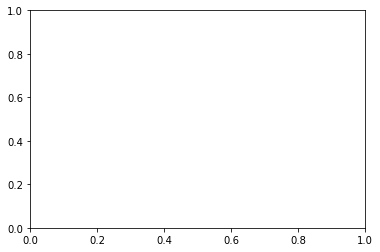

In [9]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 20*np.ones(100)
sigma[:10] = 0
lambda1 = 1/10
m = 2

def simulate_Hawkes_uniform(sigma, m, num_days):
    t = 0
    infected = [1] # start with one infected individual
    death = [0]
    while t < num_days:
        # calculate intensity at time t
        intensity = sigma[int(t)] + m * np.sum(np.exp(-lambda1*(t-np.arange(t))))
        # draw random number from uniform distribution
        u = np.random.uniform()
        # calculate time until next event
        dt = -(1/intensity)*np.log(u)
        t += dt
        if t < num_days:
        # determine if event is infection or death
            if np.random.uniform() < 0.02:
                death.append(1)
            else:
                infected.append(1)
    return infected, death

infected, death = simulate_Hawkes_uniform(sigma, m, 100)

plt.plot(range(100), infected, label='Infected')
plt.plot(range(100), death, label='Death')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Number of Individuals')
plt.title('Hawkes Process with uniform h(t)')

In [2]:
import numpy as np

# Parameters of the Hawkes process
sigma = lambda t: 20 * (t < 10)  # Intensity function for exogenous component
h = lambda t: np.random.uniform(0, 20)  # Kernel function (uniform)
m = 2  # Average number of events generated by each event in the process

# Time horizon
T = 100  # Days

# Simulate Hawkes process
event_times = []  # List of event times
t = 0  # Current time
while t < T:
    # Calculate intensity at current time
    intensity = sigma(t) + sum(h(t - t_i) for t_i in event_times)
    # Generate inter-event time
    dt = np.random.exponential(1/intensity)
    # Generate number of events
    n_events = np.random.poisson(m * intensity * dt)
    # Update event times and current time
    event_times += [t + dt] * n_events
    t += dt

# Calculate number of infected and death individuals at each time
infected = np.zeros(T)
death = np.zeros(T)
for t_i in event_times:
    infected[int(t_i)] += 1
    death[int(t_i)] += np.random.binomial(1, 0.02)

# Plot evolution of infected and death individuals
import matplotlib.pyplot as plt

plt.plot(infected, label='Infected')
plt.plot(death, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
import numpy as np

# Parameters of the Hawkes process
sigma = lambda t: 20 * (t < 10)  # Intensity function for exogenous component
h = lambda t: np.random.uniform(0, 20)  # Kernel function (uniform)
m = 2  # Average number of events generated by each event in the process

# Time horizon
T = 365  # Days

# Function to calculate intensity reduction factor due to interventions
rho = lambda t: 1  # Placeholder function (no reduction)

# Calculate total cost of interventions
k = 1  # Proportionality constant
cost = k * sum(rho(t)**2 for t in range(T))

# Simulate Hawkes process with adjusted intensity function
event_times = []  # List of event times
t = 0  # Current time
while t < T:
    # Calculate intensity at current time
    intensity = sigma(t) * rho(t) + sum(h(t - t_i) for t_i in event_times)
    # Generate inter-event time
    dt = np.random.exponential(1/intensity)
    # Generate number of events
    n_events = np.random.poisson(m * intensity * dt)
    # Update event times and current time
    event_times += [t + dt] * n_events
    t += dt

# Calculate number of infected and death individuals at each time
infected = np.zeros(T)
death = np.zeros(T)
for t_i in event_times:
    infected[int(t_i)] += 1
    death[int(t_i)] += np.random.binomial(1, 0.02)

# Plot evolution of infected and death individuals
import matplotlib.pyplot as plt

plt.plot(infected, label='Infected')
plt.plot(death, label='Death')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.legend()
plt.show()

# Plot obtained cost over one year
plt.plot(cost, label='Cost')
plt.xlabel('Time (days)')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [3]:
#another code generated by chat gpt 

In [ ]:
#this shit donsn't stop running

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigma(t):
    return 20 * (t >= 0) * (t < 10)

def h1(t):
    return np.random.uniform(0, 20)

def h2(t):
    lambda_ = 1 / 10
    return lambda_ * np.exp(-lambda_ * t)

def simulate_epidemic(h, m, t_max=100):
    infected = [1]
    death = [0]
    recover = [0]
    t = [0]
    while t[-1] < t_max:
        # compute intensity function
        lambda_ = m * infected[-1] + sigma(t[-1]) * np.sum(h(t[-1] - np.array(t[:-1])))
        # sample time to next event
        t_next = t[-1] + np.random.exponential(1 / lambda_) # this is the thea that creates the next t
        # Tw + thea
        t.append(t_next)
        # determine type of event
        p = infected[-1] / (infected[-1] + recover[-1])
        if np.random.uniform() < p:
            infected.append(infected[-1] + 1)
        elif np.random.uniform() < 0.02:
            death.append(death[-1] + 1)
            infected[-1] -= 1
        else:
            recover.append(recover[-1] + 1)
            infected[-1] -= 1
    return t, infected, death, recover

# simulate epidemic with h1
t, infected, death, recover = simulate_epidemic(h1, 2)

# plot results
plt.plot(t, infected, label='infected')
plt.plot(t, death, label='death')
plt.plot(t, recover, label='recover')
plt.legend()
plt.show()

# # simulate epidemic with h2
# t, infected, death, recover = simulate_epidemic(h2, 2)

# # plot results
# plt.plot(t, infected, label='infected')
# plt.plot(t, death, label='death')
# plt.plot(t, recover, label='recover')
# plt.legend()
# plt.show()

KeyboardInterrupt: 

In [11]:
import random
import math
def univariate_hawkes_poisson(mu, alpha, beta, T):
    event_times = set()
    s = 0
    n = 0
    while s < T:
        lambda_bar = mu + sum([alpha * math.exp(-beta * (s - tau)) for tau in event_times])
        u = random.uniform(0, 1)
        w = -math.log(u) / lambda_bar
        s = s + w
        D = random.uniform(0, 1)
        if D * lambda_bar <= mu + sum([alpha * math.exp(-beta * (s - tau)) for tau in event_times]):
            n = n + 1
            tn = s
            event_times.add(tn)
    if tn <= T:
        return list(event_times)[:n]
    else:
        return list(event_times)[:n-1]


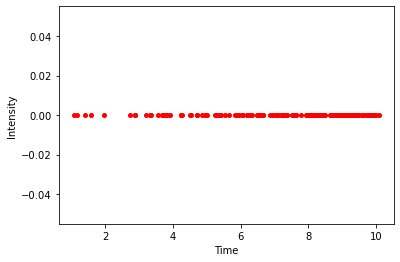

In [12]:
import matplotlib.pyplot as plt

# Generate points using the univariate_hawkes_poisson function
points = univariate_hawkes_poisson(mu=1, alpha=0.5, beta=0.2, T=10)

# Plot the points
plt.plot(points, [0] * len(points), 'ro', markersize=4)

# Add labels and show the plot
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()


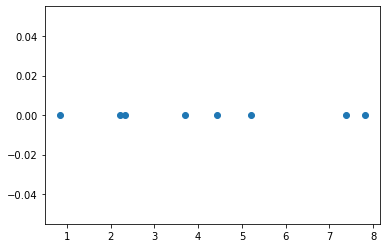

In [9]:
import random
import matplotlib.pyplot as plt
from math import log
def simulate_hawkes(intensity, decay, T):
    s = 0
    n = 0
    event_times = []
    while s < T:
        intensity_at_s = intensity + sum(decay * intensity * (s - t) for t in event_times)
        u = random.uniform(0, 1)
        w = -1 * log(u) / intensity_at_s
        s += w
        D = random.uniform(0, 1)
        if D * intensity_at_s < intensity:
            n += 1
            tn = s
            event_times.append(tn)
    if tn < T:
        return event_times
    else:
        return event_times[:-1]

# Set the parameters of the Hawkes process
intensity = 1.0
decay = 0.5
T = 10

# Simulate the Hawkes process
event_times = simulate_hawkes(intensity, decay, T)

# Plot the event times
plt.scatter(event_times, [0] * len(event_times))
plt.show()

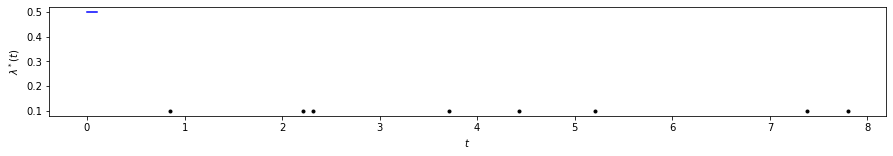

In [11]:
# !pip install hawkeslib
#from hawkeslib import UnivariateExpHawkesProcess
import numpy as np
import matplotlib.pyplot as plt


mu, alpha, beta = .1, .2, .1
#uv = UnivariateExpHawkesProcess()
#uv.set_params(mu, alpha, beta)
smp = np.asarray(event_times)

# smp = np.asarray([0.011222841099724191,
#  0.01968597092052369,
#  0.02850985538279263,
#  0.03351525957335989,
#  0.10442196165471858])

range_list = np.arange(0, .1, .001)
# range_list = np.arange(0, 100, .1)

lda_ar = [0.5 + np.sum(0.5 * 0.5 * np.exp(-0.5 * (x - smp[smp < x]))) \
          for x in range_list]

plt.figure(figsize=(15,2))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
plt.xlabel("$t$")
plt.plot(smp, np.ones_like(smp) * .1, 'k.')
_ = plt.plot(range_list, lda_ar, 'b-')

# final codes 

# First part 

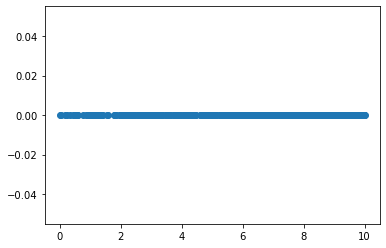

In [7]:
#this is the code for simulation
#this is code is prodecued by giving chat gpt the pseudo code available in page 11 of the pdf file
'''
T is the upper bound on the time for the simulation. The simulation continues until the current time s exceeds T.
sigma(t) is the base intensity at time t,
decay is the excitation parameter
tau is a point in the set of event times event_times.
'''
from math import log, exp
import random
import matplotlib.pyplot as plt

# we can write the code for function sigma in two ways:
# or we can just a variable and call it meu (u or whatever)

# def sigma(t): 
#     if t >= 0 and t <= 10:
#           return 20
#     else:
#           return 0
        
def sigma(t):
    return 20 * (t >= 0) * (t < 10)

#we need to write the code for each h(t)
# h(t)s are the decay kernel function
#h2 in prof's question is different from what there is in the page 11 of that pdf

def h1(t):
    return np.random.uniform(0, 20) 

def h2(t): 
    lambda_exp = 1/10
    return lambda_exp * exp(-1 * (lambda_exp * t))


def simulate_hawkes(intensity, decay, T):
    s = 0 # current time 
    n = 0 # number of events and also the number of infected people 
    event_times = [] # set of event times
    while s < T: 
        intensity_at_s = sigma(s) + sum(decay * h2(s - t) for t in event_times)
#         intensity_at_s = sigma(s) + sum(decay * h1(s - t) for t in event_times)
        u = random.uniform(0, 1)
        w = -1 * (log(u) / intensity_at_s) 
        s += w # updating the current time 
        D = random.uniform(0, 1) #using this variable to see if a new event if going to happen or not

        intensity_prob = sigma(s) + sum(decay * h2(s - t) for t in event_times)
#         intensity_prob = sigma(s) + sum(decay * h1(s - t) for t in event_times)


        if D * intensity_at_s < intensity_prob: # intensity_at_s is lambda bar line 8 of the algorithm
            n += 1
            tn = s
            event_times.append(tn) 
    if tn < T:
        dead_ppl=int(0.2 * n)
        return event_times 
    else:
        dead_ppl=int(0.2 * n)
        return event_times[:-1]

# Set the parameters of the Hawkes process
intensity = 0.5 # is the value landa (or lambda, idk)
decay = 2 # is the value for (W)
T = 10 # upper bound of the time  in our case it sould be equal to 100 

# Simulate the Hawkes process
event_times = simulate_hawkes(intensity, decay, T)

# Plot the event times # wichi is actually the number of infected ppl in that period of time 
plt.scatter(event_times, [0] * len(event_times)) # gives us a set of points 
plt.show()

# Description for the cell above (generated by chat gpt)
This code simulates a univariate Hawkes process with an exponential kernel and intensity function lambda(t) = sigma(t) + sum(decay * h(t - tau)), where sigma(t) is the base intensity at time t, decay is the excitation parameter, h(t) is the decay kernel function, and tau is a point in the set of event times event_times.

The simulate_hawkes function takes in three parameters: intensity, decay, and T, and returns a list of the event times that occurred during the simulation. The simulation continues until the current time s exceeds T.

The function begins by initializing the time s to 0, the number of events n to 0, and an empty list event_times to store the event times. The function then enters a loop that continues until s exceeds T.

Inside the loop, the intensity at time s is calculated as the base intensity sigma(s) plus the sum of the decay kernel function h(s - tau) for all event times tau in event_times. A uniform random number u is then generated, and the value w is calculated as the negative natural logarithm of u divided by the intensity at s. The time s is then updated to be s + w.

Another uniform random number D is generated, and the intensity probability at time s is calculated as the base intensity sigma(s) plus the sum of the decay kernel function h(s - tau) for all event times tau in event_times. If the product of D and the intensity at s is less than the intensity probability at s, then the event at time s is accepted and added to the list of event times event_times. The number of events n is incremented, and the loop continues until s exceeds T.

After the loop ends, the function checks whether the final event time tn occurred before T. If it did, then the function returns the complete list of event times event_times. If tn occurred after T, then the function returns the list event_times with the final event time removed.

Finally, the event times are plotted as a scatter plot using matplotlib.

# Description for the cell below (generated by chat gpt) <br>
This code generates a plot of the intensity function lambda(t) for a Hawkes process based on the event times generated in the previous code.

The event times are first converted to a NumPy array smp. A list of values range_list is then generated using the arange function from NumPy, which returns evenly spaced values over a specified interval.

A loop is then performed over the values in range_list, and for each value x, a list temp_list is created containing the decay kernel function h(x - t) for all event times t in smp that occurred before x. The intensity function lambda(x) is then calculated as the base intensity sigma(x) plus the sum of temp_list multiplied by the decay parameter decay. The value of lambda(x) is then appended to a list lda_ar.

After the loop ends, a figure is created using matplotlib, and the event times are plotted as a scatter plot using the plot function. The intensity function lambda(t) is then plotted using the plot function and the list lda_ar. Finally, the plot is displayed using the show function.

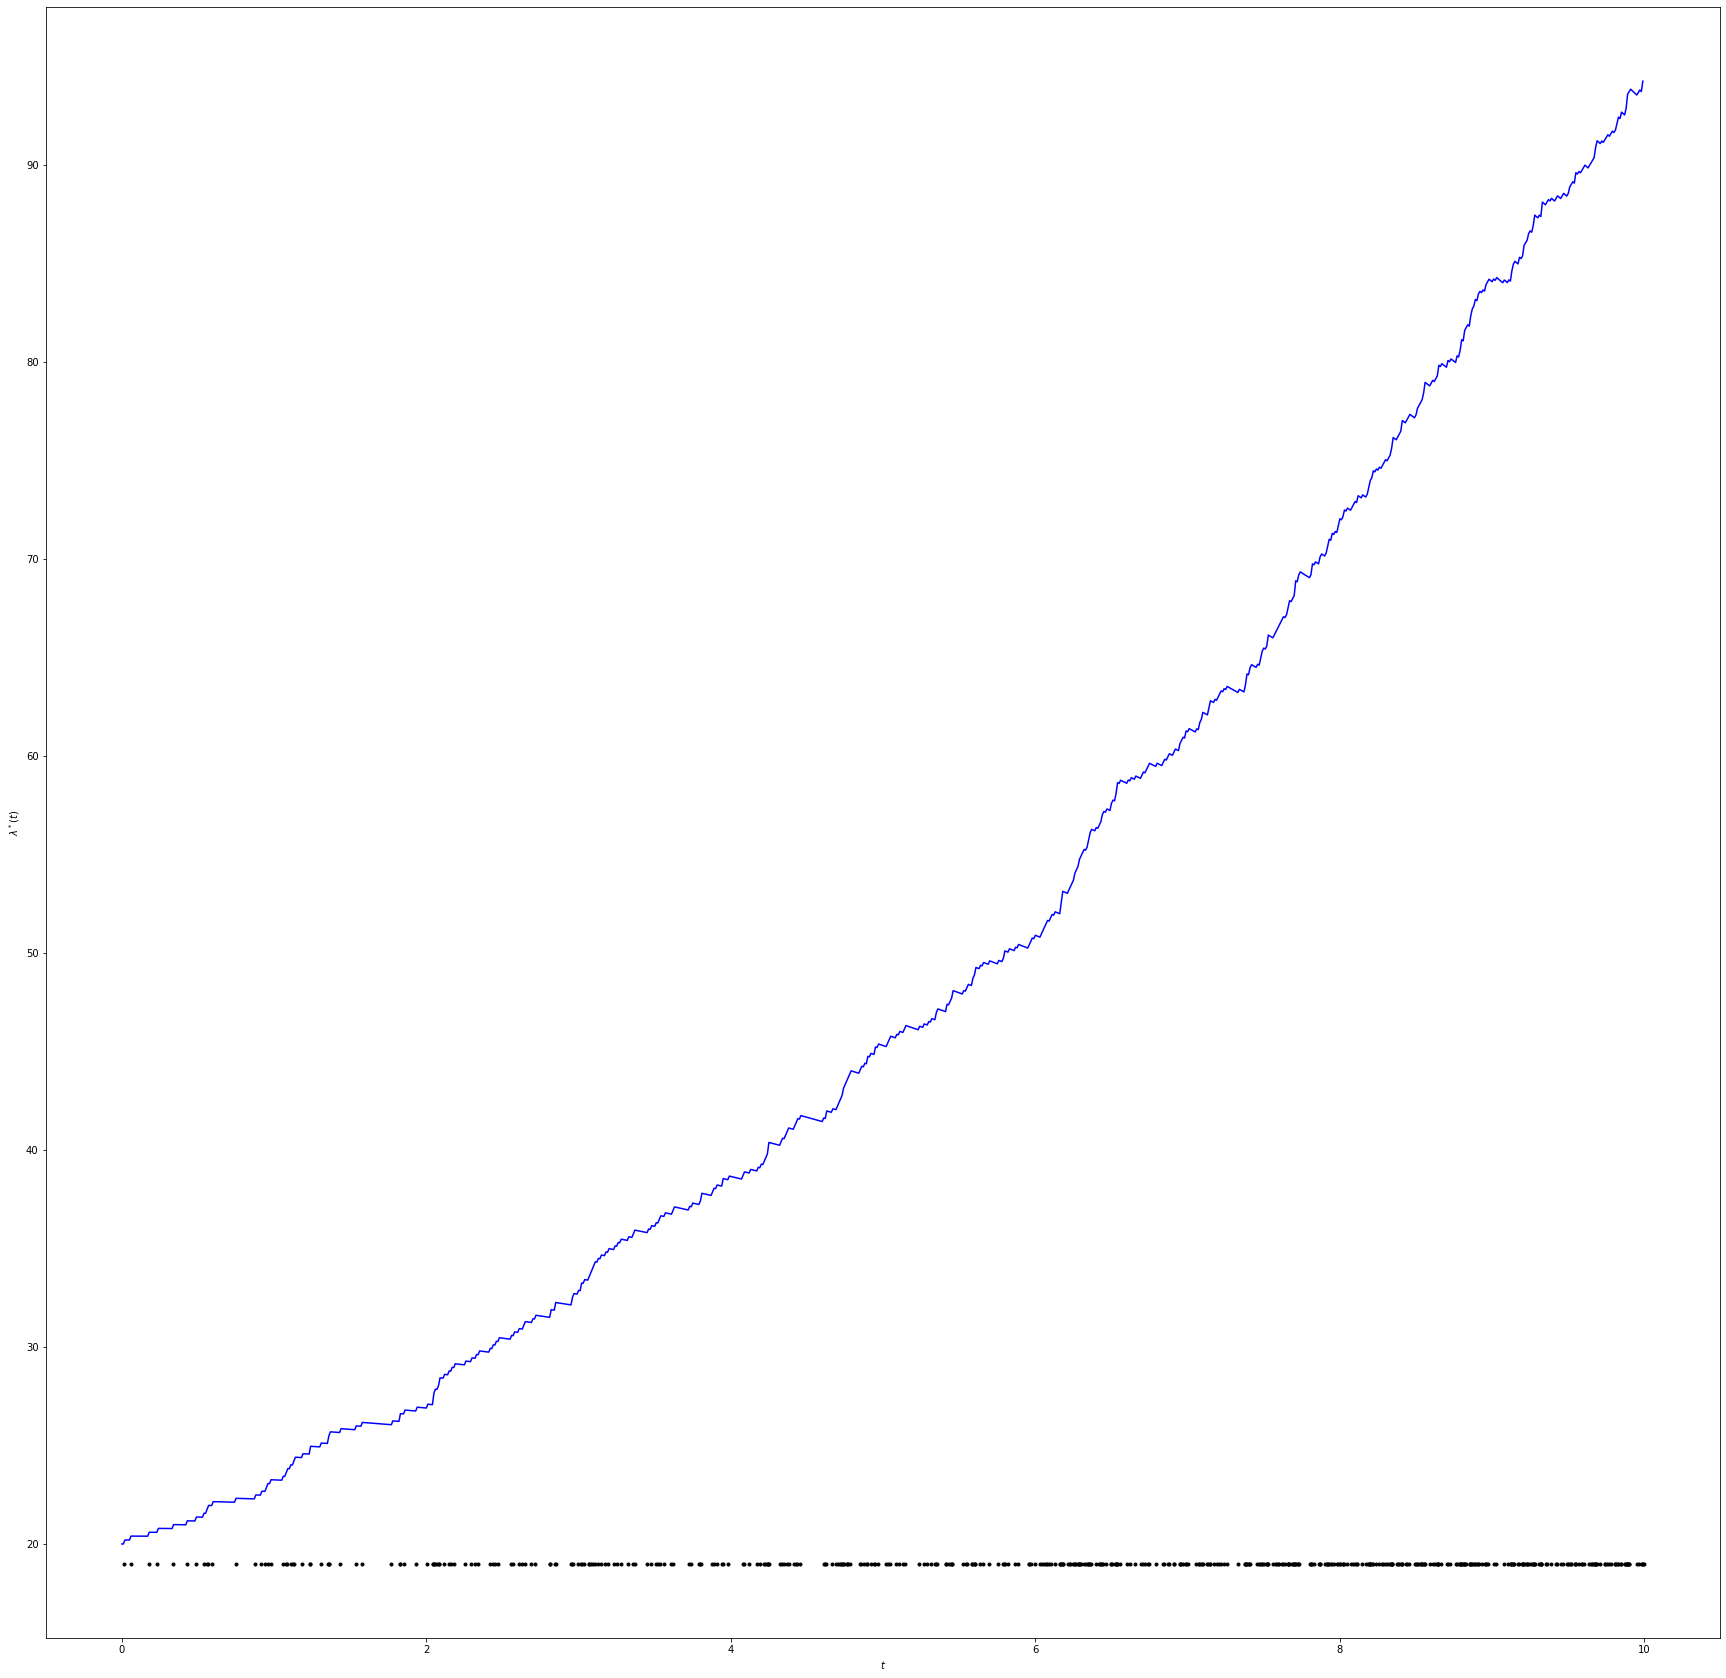

In [8]:
import numpy as np
import matplotlib.pyplot as plt

smp = np.asarray(event_times) # we create a smp with the lenght of the events 


range_list = np.arange(0, 10, .01)



lda_ar = []

for x in range_list:
    temp_list = [h2(x - t) for t in smp[smp < x]]
#     temp_list = [h1(x - t) for t in smp[smp < x]]

    # print(0.1 + np.sum(temp_list))
    lda_ar.append(sigma(x) +decay* np.sum(temp_list)) # that 2 is the value for decay
    # it should be changed to decay

plt.figure(figsize=(30,30))
# plt.yscale("log")
plt.ylabel("$\lambda^*(t)$")
plt.xlabel("$t$")
# plt.yticks(np.arange(0, 3, 0.1))
plt.plot(smp, np.ones_like(smp) * 19, 'k.')
_ = plt.plot(range_list, lda_ar, 'b-')

<b>Questions about the first part </b><br>

<b>I have to read the slides and the pdf files again, notations in the code and in the pdf and in prof's slides are different  </b> <br>

<b>The most important thing is that I have to find the relation between the code and the slides (page 11 of the pdf on which we coded the algorithm(Thinning algorithm))</b> <br>
    
1- should the value for T be equal to 100? ( since we are going to simulate it for 100 days? <br>
<b>Answer:</b> Yes <br>

2- I have to find the meaning of the variables alpha and beta,mue, w, decay?<br>
<b>Answer:</b> meu (u) is function sigma, alpha is decay(more explanations are available in the description created by chat gpt), idk about beta, w is how we create new s (new time, in prof's slides it's thau that is added to the current time I guess)  <br>

3- are the plots we're creating the right ones?<br>
<b>Answer:</b>       <br>

4- What is Dt?<br>
<b>Answer:</b>       <br>



The first part is done, the simulatin is done. <br>
Now we have to answer the second part

# Second part